In [33]:
import torch 
from torch import nn

from sklearn.model_selection import train_test_split

In [34]:
from sklearn import datasets # to create makemoon dataset 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [35]:
X,y = datasets.make_moons(n_samples=1000,
                        noise=0.2,
                        random_state=42)

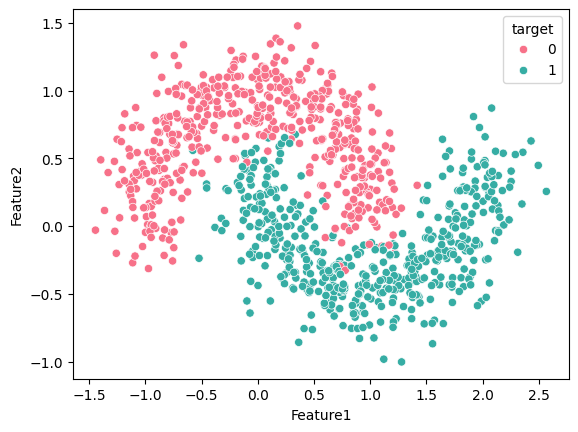

In [36]:
data_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data_df['target'] = y

# Visualize the data distribution
sns.scatterplot(x='Feature1', y='Feature2', hue='target', data=data_df, palette='husl')
plt.show()

In [37]:
data_df.head()

,Feature1,Feature2,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [38]:
x = data_df.drop(columns='target')
y = data_df['target']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23,shuffle=True,stratify=y)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(800, 2) (800,) (200, 2) (200,)


In [40]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)  s
y_train = torch.tensor(y_train.values, dtype=torch.float32)  
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)  

In [42]:

class Classificationmodel32(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2,out_features=3)
        self.linear2 = nn.Linear(in_features=3,out_features=6)
        self.linear3 = nn.Linear(in_features=6,out_features=3)
        self.linear4 = nn.Linear(in_features=3,out_features=1)

        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.tanh(x)

        x = self.linear2(x)
        x = self.tanh(x)
        
        x = self.linear3(x)
        x = self.tanh(x)
        
        x = self.linear4(x)
        x = self.sigmoid(x)

        return x.squeeze()


In [26]:
model2 = Classificationmodel32()
model2.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427]])),
             ('linear1.bias', tensor([-0.3443,  0.4153,  0.6233])),
             ('linear2.weight',
              tensor([[-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784],
                      [-0.0815,  0.4451,  0.0853],
                      [-0.2695,  0.1472, -0.2660],
                      [-0.0677, -0.2345,  0.3830],
                      [-0.4557, -0.2662, -0.1630]])),
             ('linear2.bias',
              tensor([-0.3471,  0.0545, -0.5702,  0.5214, -0.4904,  0.4457])),
             ('linear3.weight',
              tensor([[ 0.0679, -0.1326,  0.2523,  0.0636,  0.3298,  0.0446],
                      [-0.1288,  0.1097, -0.1107,  0.1718,  0.3645,  0.2360],
                      [-0.1785,  0.2357,  0.0730,  0.2073, -0.2488, -0.4041]])),
             ('linear3.bias', tensor([-0.1577, -0.31

In [27]:
# Create the loss function
loss_fn = nn.BCELoss() # Binary Cross Entropy for Binary Classification Data 

# Create the optimizer
optimizer = torch.optim.SGD(params=model2.parameters(), # parameters of target model2 to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [28]:
torch.manual_seed(42)

epochs = 10000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):

    # Put model2 in training mode (this is the default state of a model2)
    model2.train() 

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model2(x_train)

    # 2. Calculate the loss (how different are our model2s predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

  ### Testing

    # Put the model2 in evaluation mode
    model2.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model2(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 1000 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.6918509006500244 | MAE Test Loss: 0.691906213760376 
Epoch: 1000 | MAE Train Loss: 0.5851905345916748 | MAE Test Loss: 0.5861393809318542 
Epoch: 2000 | MAE Train Loss: 0.345015287399292 | MAE Test Loss: 0.3579312264919281 
Epoch: 3000 | MAE Train Loss: 0.3158148527145386 | MAE Test Loss: 0.33406969904899597 
Epoch: 4000 | MAE Train Loss: 0.3021758198738098 | MAE Test Loss: 0.3203861713409424 
Epoch: 5000 | MAE Train Loss: 0.2786456346511841 | MAE Test Loss: 0.2952251136302948 
Epoch: 6000 | MAE Train Loss: 0.2214016169309616 | MAE Test Loss: 0.23798009753227234 
Epoch: 7000 | MAE Train Loss: 0.1401222050189972 | MAE Test Loss: 0.15735802054405212 
Epoch: 8000 | MAE Train Loss: 0.10098892450332642 | MAE Test Loss: 0.11795035004615784 
Epoch: 9000 | MAE Train Loss: 0.08663607388734818 | MAE Test Loss: 0.1024228110909462 


In [30]:
y_pred = model2(x_train)
y_pred_val = []

for i in y_pred:
    if i > 0.5:
        y_pred_val.append(1)
    else:
        y_pred_val.append(0)

y_pred_val = np.transpose(y_pred_val)

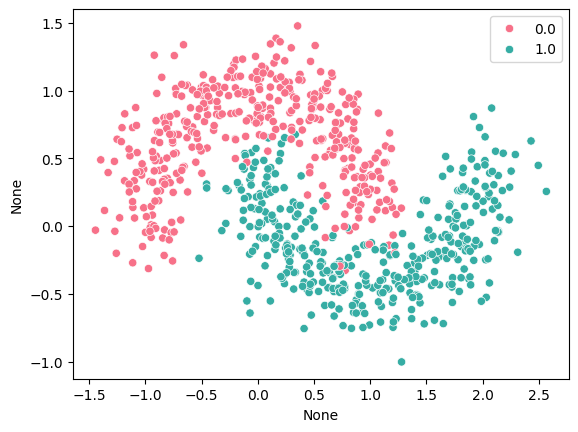

In [31]:
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train.detach().numpy(), palette='husl')
plt.show()

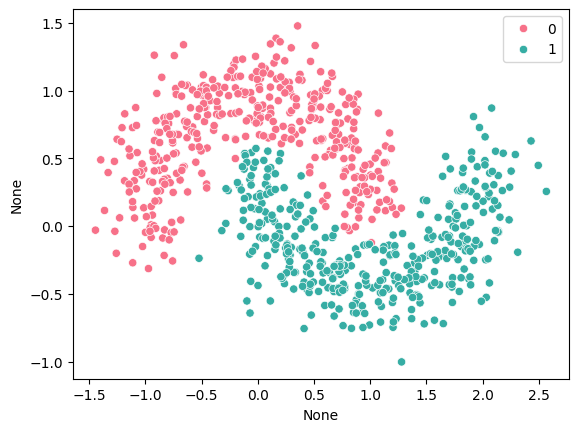

In [32]:
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_pred_val, palette='husl')
plt.show()